In [1]:
import mne

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from itertools import product
import neurokit2 as nk
from pymatreader import read_mat
import time
from scipy.stats import iqr
from scipy.stats import shapiro
import seaborn as sns

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
from matplotlib import pyplot as plt

## Figure 7

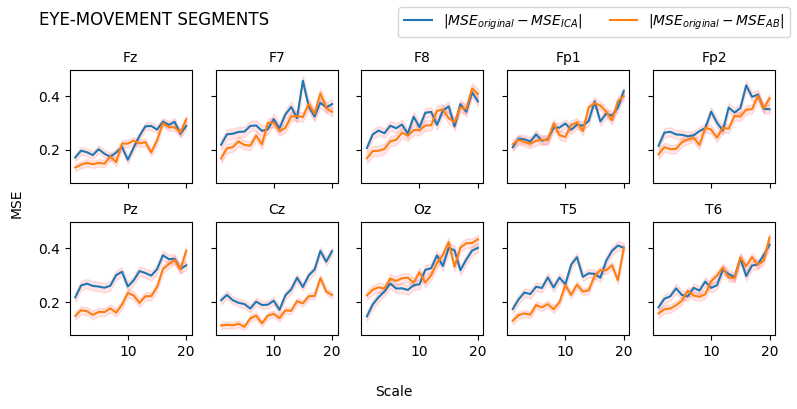

In [56]:
selected_channels = ['Fz','F7','F8','Fp1','Fp2','Pz','Cz', 'Oz','T5','T6']
fig, axes = plt.subplots(2,5,figsize=(8, 4),sharex=True, sharey=True)

for ax, channel in zip(axes.ravel(), selected_channels):
    mse = pd.read_csv(f'/Users/lina_01/Desktop/ab_ica/mse_{channel}.csv')
    pt_list = mse['pt'].unique()
    mse = mse[mse['entropy'].astype(str).str.contains('inf')==False]
    mse = mse[mse['entropy'].astype(str).str.contains('#NAME?')==False]
    mse = mse.astype({'entropy':'float'})
    mse_saccade = mse.loc[(mse['seg_type']=='saccade')]
    tmp = mse_saccade.pivot_table(index = ["pt","channel","seg_type","Scale"], columns="kind",values="entropy")
    original = tmp['original']
    ab = tmp['AB']
    ica = tmp['ICA']
    
    diff_AB = (original - ab).abs()
    diff_AB.name = "diff_mse"
    diff_AB = diff_AB.reset_index()
    
    diff_ICA = (original - ica).abs()
    diff_ICA.name = "diff_mse"
    diff_ICA = diff_ICA.reset_index()
    
    diff_ICA_mean = diff_ICA.groupby(['Scale']).mean(numeric_only=True).reset_index()
    diff_AB_mean = diff_AB.groupby(['Scale']).mean(numeric_only=True).reset_index()
    
    ci_ica = 1.96 * np.std(diff_ICA['diff_mse'])/np.sqrt(997)
    ci_ab = 1.96 * np.std(diff_AB['diff_mse'])/np.sqrt(997)
    
    mse_saccade = mse_saccade.groupby(['Scale']).mean(['diff_ica','diff_ab']).reset_index()
    
    ax.plot(diff_ICA_mean['Scale'], diff_ICA_mean['diff_mse'], label='|$MSE_{original}-MSE_{ICA}$|')
    ax.fill_between(diff_ICA_mean['Scale'], (diff_ICA_mean['diff_mse']-ci_ica), (diff_ICA_mean['diff_mse']+ci_ica), color='r',alpha=0.1)
    ax.plot(diff_AB_mean['Scale'], diff_AB_mean['diff_mse'], label='|$MSE_{original}-MSE_{AB}$|')
    ax.fill_between(diff_AB_mean['Scale'], (diff_AB_mean['diff_mse']-ci_ab), (diff_AB_mean['diff_mse']+ci_ab), color='r',alpha=0.1)

    ax.set_title(channel,fontsize=10)

fig.patch.set_facecolor('white')
fig.suptitle('EYE-MOVEMENT SEGMENTS',fontsize=12,x=0.2)
fig.supylabel('MSE',fontsize=10)
fig.supxlabel('Scale',fontsize=10)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=3,loc='outside right upper',fontsize=10)

fig.tight_layout()
plt.savefig('fig6a.png')

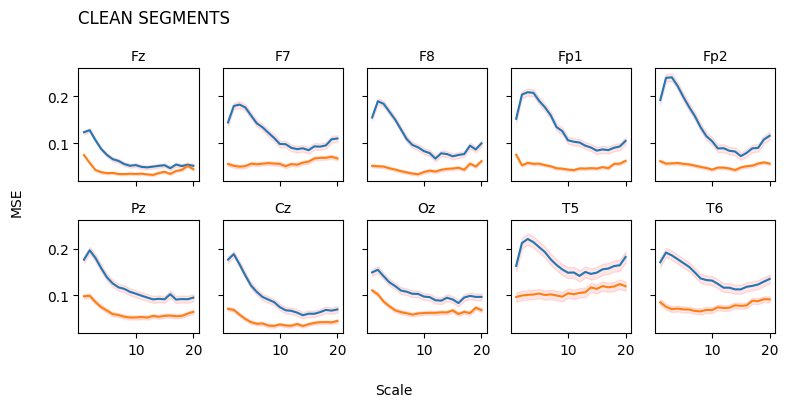

In [59]:
selected_channels = ['Fz','F7','F8','Fp1','Fp2','Pz','Cz', 'Oz','T5','T6']
fig, axes = plt.subplots(2,5,figsize=(8, 4),sharex=True, sharey=True)

for ax, channel in zip(axes.ravel(), selected_channels):
    mse = pd.read_csv(f'/Users/lina_01/Desktop/ab_ica/mse_{channel}.csv')
    pt_list = mse['pt'].unique()
    mse = mse[mse['entropy'].astype(str).str.contains('inf')==False]
    mse = mse[mse['entropy'].astype(str).str.contains('#NAME?')==False]
    mse = mse.astype({'entropy':'float'})
    mse_clean = mse.loc[(mse['seg_type']=='clean')]
    tmp = mse_clean.pivot_table(index = ["pt","channel","seg_type","Scale"], columns="kind",values="entropy")
    original = tmp['original']
    ab = tmp['AB']
    ica = tmp['ICA']
    
    diff_AB = (original - ab).abs()
    diff_AB.name = "diff_mse"
    diff_AB = diff_AB.reset_index()
    
    diff_ICA = (original - ica).abs()
    diff_ICA.name = "diff_mse"
    diff_ICA = diff_ICA.reset_index()
    
    diff_ICA_mean = diff_ICA.groupby(['Scale']).mean(numeric_only=True).reset_index()
    diff_AB_mean = diff_AB.groupby(['Scale']).mean(numeric_only=True).reset_index()
    
    ci_ica = 1.96 * np.std(diff_ICA['diff_mse'])/np.sqrt(997)
    ci_ab = 1.96 * np.std(diff_AB['diff_mse'])/np.sqrt(997)
    
    mse_clean = mse_clean.groupby(['Scale']).mean(['diff_ica','diff_ab']).reset_index()
    
    ax.plot(diff_ICA_mean['Scale'], diff_ICA_mean['diff_mse'], label='|$MSE_{original}-MSE_{ICA}$|')
    ax.fill_between(diff_ICA_mean['Scale'], (diff_ICA_mean['diff_mse']-ci_ica), (diff_ICA_mean['diff_mse']+ci_ica), color='r',alpha=0.1)
    ax.plot(diff_AB_mean['Scale'], diff_AB_mean['diff_mse'], label='|$MSE_{original}-MSE_{AB}$|')
    ax.fill_between(diff_AB_mean['Scale'], (diff_AB_mean['diff_mse']-ci_ab), (diff_AB_mean['diff_mse']+ci_ab), color='r',alpha=0.1)

    ax.set_title(channel,fontsize=10)

fig.patch.set_facecolor('white')
fig.suptitle('CLEAN SEGMENTS',fontsize=12,x=0.2)
fig.supylabel('MSE',fontsize=10)
fig.supxlabel('Scale',fontsize=10)
handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, ncol=3,loc='outside right upper',fontsize=10)
fig.tight_layout()
plt.savefig('fig6b.png')

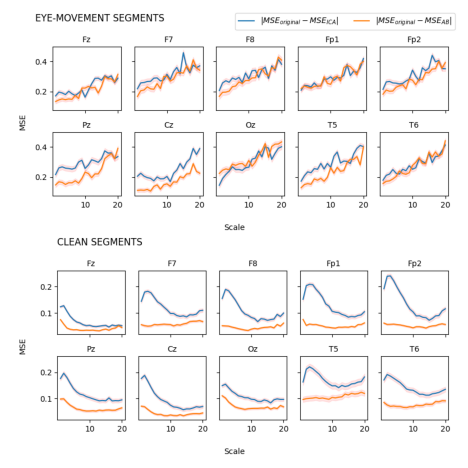

In [60]:
import matplotlib.image as mpimg
figures = ['6a','6b']
margin = 200
fig, axes = plt.subplots(2, 1, figsize=(6, 4.6))
for figure, ax in zip(figures, axes.ravel()):
    img = mpimg.imread(f"/Users/lina_01/Desktop/ab_ica/fig{figure}.png")
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set(frame_on=False)
    
    ax.imshow(img)        
    ax.set_aspect(1)    
    
fig.tight_layout(rect=[-0.01, -0.02, 1.02, 1.02], w_pad=0.0, h_pad=0.0)
fig.savefig("fig6.png", dpi=300)

### Code to create the dataframe 'df_entropy_20_scales.csv'

In [ ]:
montage = mne.channels.make_standard_montage(kind='GSN-HydroCel-129')
info = mne.create_info(montage.ch_names, sfreq=500, ch_types='eeg')
raw = mne.io.RawArray(np.zeros([129,1]), info).set_montage(montage)

In [8]:
ab_ica_pt_selection = pd.read_excel('C:/Users/diksh/Downloads/AB_ICA_pt_table_trial.xlsx')

In [ ]:
start_time = time.time()
entropy_dfs = []
kinds = ['original', 'AB', 'ICA']
seg_types = ['clean', 'saccade']
path = 'C:/Users/diksh/Downloads'
pts = list(ab_ica_pt_selection['pt'])
for kind, seg_type in product(kinds, seg_types):
    for pt in pts:
        channels = raw.ch_names[0:5]
        annot_file = f'/Users/diksh/Downloads/manual_annot_AB_ICA_{pt}.csv'
        annotations = mne.read_annotations(annot_file)
        times = {}
        for annot in annotations:
            times['onset'] = np.array([annot['onset'] for annot in annotations if annot['description']==seg_type])
            times['duration'] = np.array([annot['duration'] for annot in annotations if annot['description']==seg_type])
            times['offset'] = times['onset'] + times['duration']
            
        sampens = []
        for chan in channels:
            crops = []
            for tmin, tmax in zip(times['onset'],times['offset']):
                if kind=='original':
                    raw_file = mne.io.read_raw_fif(f'{path}/{pt}_rest_raw_processed.fif')           

                elif kind=='AB':
                    raw_file_original = mne.io.read_raw_fif(f'{path}/{pt}_rest_raw_processed.fif')
                    AB_mat_outdata = read_mat(f'{path}/{pt}_AB_outdata.mat')
                    AB_mat_outdata = AB_mat_outdata['datatosave_out']['OutData']
                    raw_file = mne.io.RawArray(AB_mat_outdata, raw_file_original.info)

                else:
                    raw_file = mne.io.read_raw_fif(f'{path}/{pt}_rest_raw_ica.fif')
                
                crop = raw_file.crop(tmin=tmin, tmax=tmax)
                crops.append(crop)

            crop_file = mne.concatenate_raws(crops) 
            crop_file_data = crop_file.get_data(picks=chan)
            m = 2
            entropy = nk.entropy_multiscale(crop_file_data.squeeze(), scale=20, dimension=2)
            entropy = pd.DataFrame({'Scale':entropy[1]['Scale'], 'Value':entropy[1]['Values']}, columns=['Scale','Value'])
            entropy['pt'] = pt
            entropy['kind'] = kind
            entropy['channel'] = chan
            entropy['seg_type'] = seg_type
            entropy_dfs.append(entropy)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
entropy_dfs = pd.concat(entropy_dfs)

In [39]:
entropy_dfs.to_csv('C:/Users/dsrish/Desktop/entropy_dfs_Cz.csv')